In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the VS Chill Inhibitor and VS Velocity Baton Datasets.

In [138]:
chill_inhibitor_df = pd.read_csv('./data/vs_chill_inhibitor.csv')
velocity_baton_df = pd.read_csv('./data/vs_velocity_baton.csv')

Create the occurrence matrices for each weapon and generate the labels.

In [139]:
chill_inhibitor_cm = chill_inhibitor_df.drop('perk', axis=1).values
chill_inhibitor_values = chill_inhibitor_cm.flatten()
chill_labels = []

for index, row in chill_inhibitor_df.iterrows():
    for column in chill_inhibitor_df.columns:
        if column == 'perk':
            continue
        chill_labels.append(f'{row['perk']} + {column}')


velocity_baton_cm = velocity_baton_df.drop('perk', axis=1).values
velocity_baton_values = velocity_baton_cm.flatten()
velocity_labels = []

for index, row in velocity_baton_df.iterrows():
    for column in velocity_baton_df.columns:
        if column == 'perk':
            continue
        velocity_labels.append(f'{row['perk']} + {column}')

We can now visualize the drop rates of rolls on each weapon:

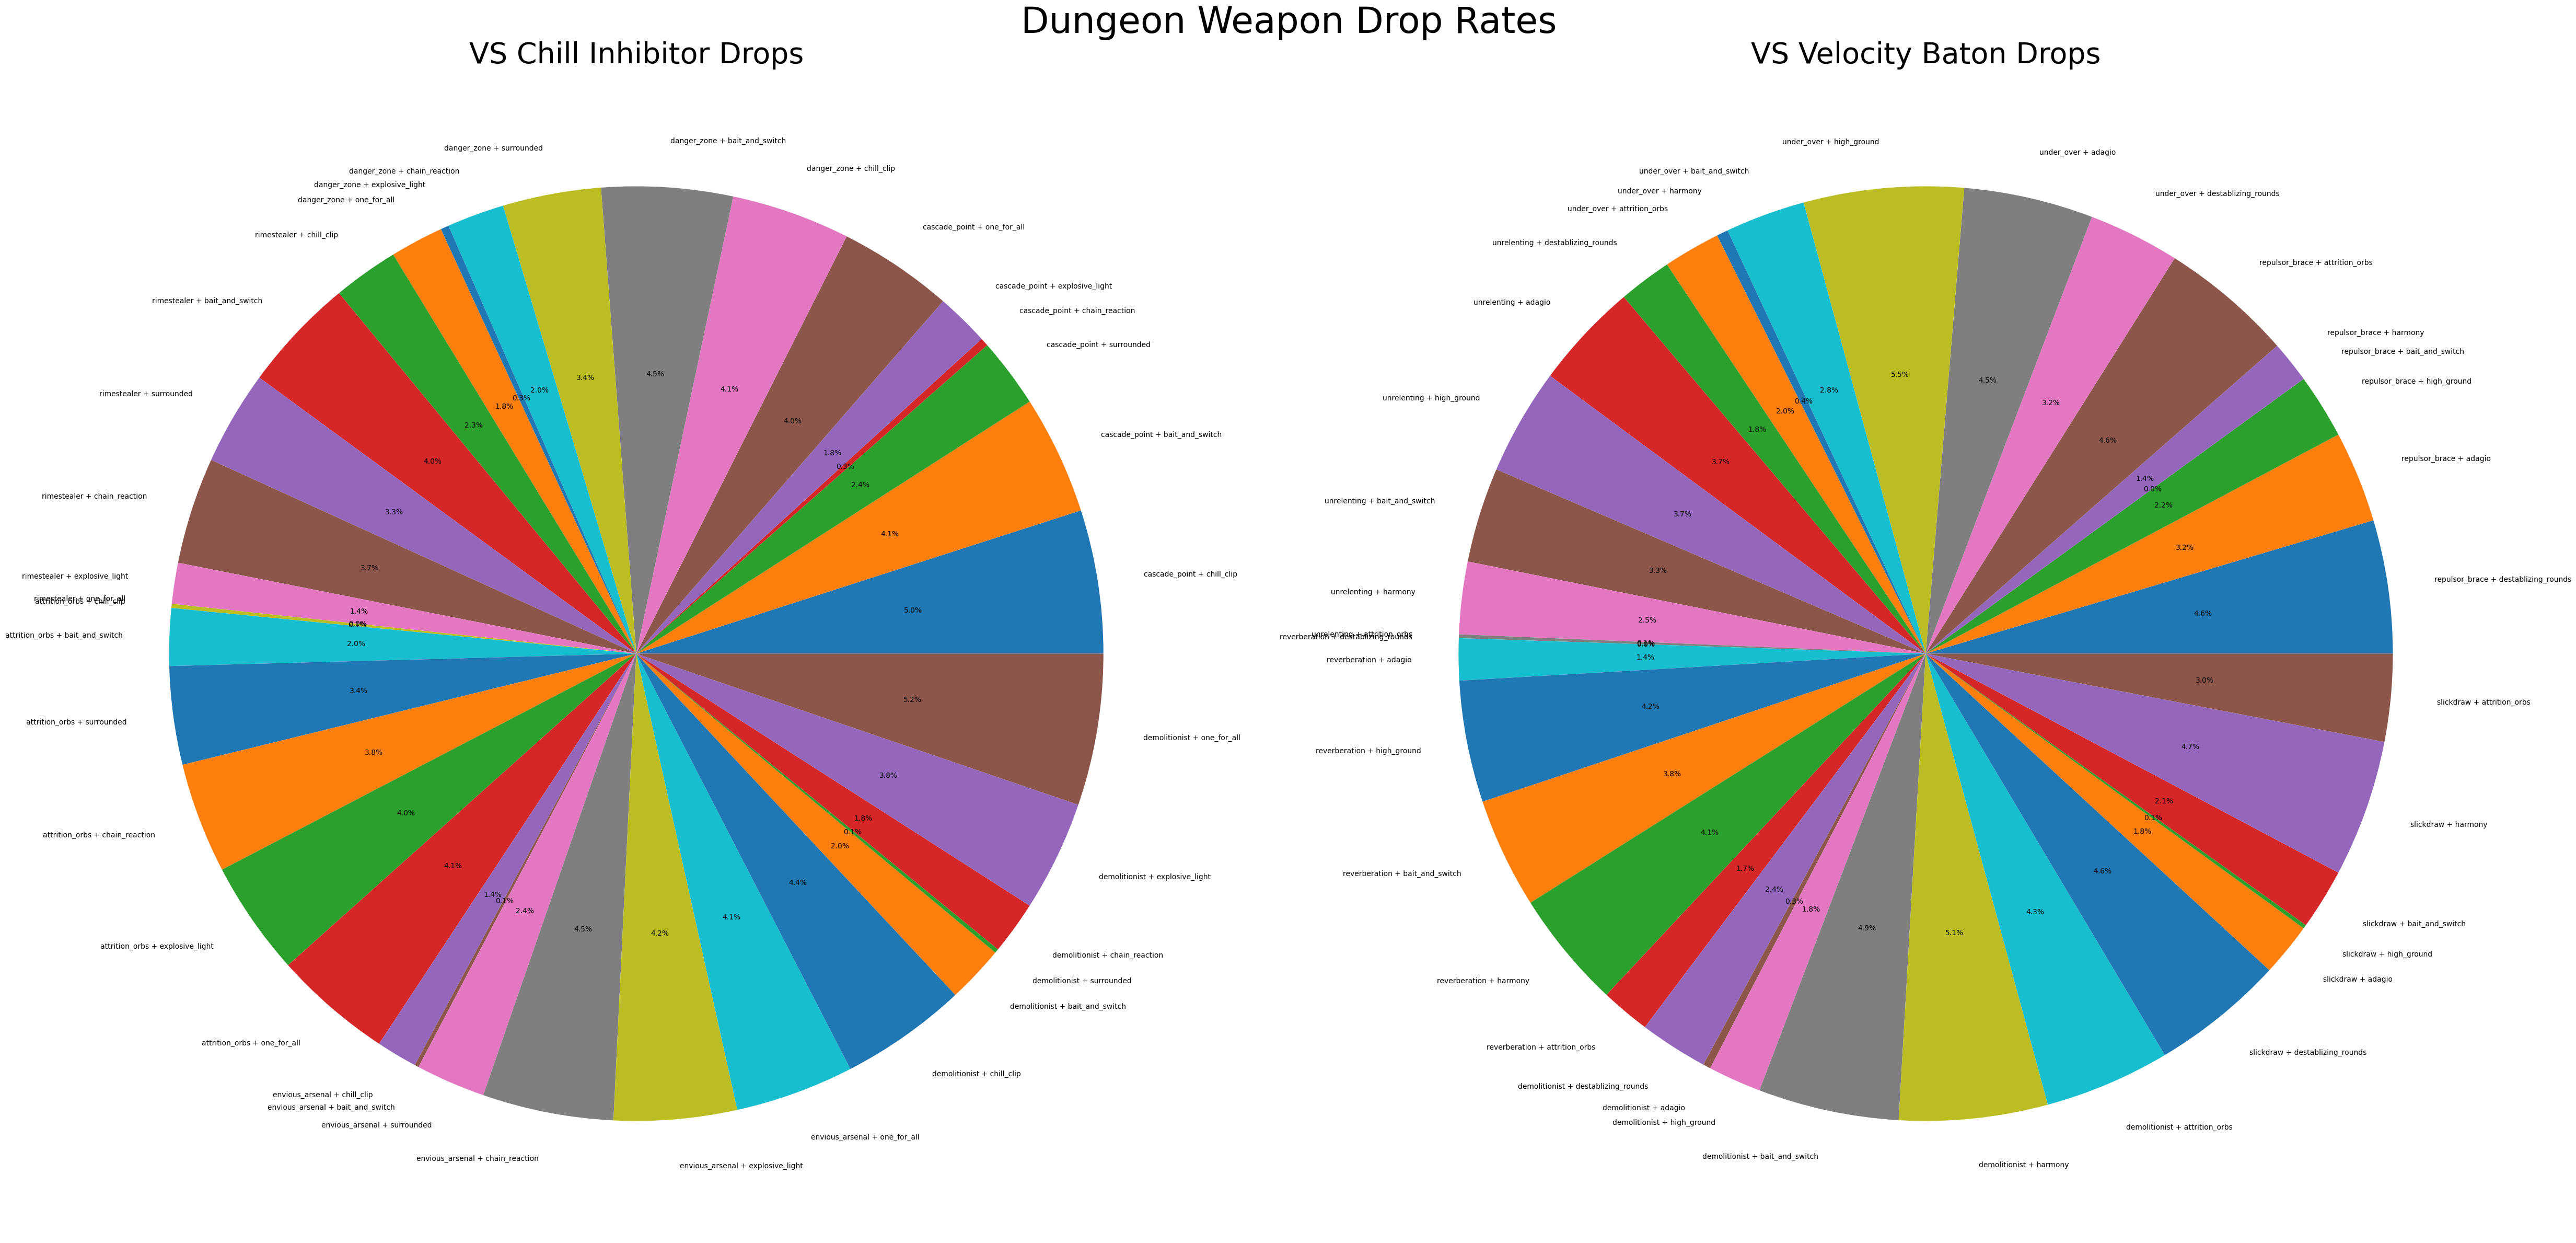

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 25))

patches, texts, things = ax1.pie(chill_inhibitor_values, labels=chill_labels, autopct='%1.1f%%')
ax1.set_title('VS Chill Inhibitor Drops', fontsize=40)
# ax1.legend(patches, chill_labels, loc='best')

patches, texts, things = ax2.pie(velocity_baton_values, labels=velocity_labels, autopct='%1.1f%%')
ax2.set_title('VS Velocity Baton Drops', fontsize=40)
# ax2.legend(patches, velocity_labels, loc='best')

fig.suptitle('Dungeon Weapon Drop Rates', fontsize=50)
plt.tight_layout()
plt.show()

Now, we can look at the distribution across rolls that already have one of the two perks desired (in this case, **Envious Arsenal** and **Bait and Switch**). 

The expected rate for each roll would be roughly **1/11**, or about **9%**.

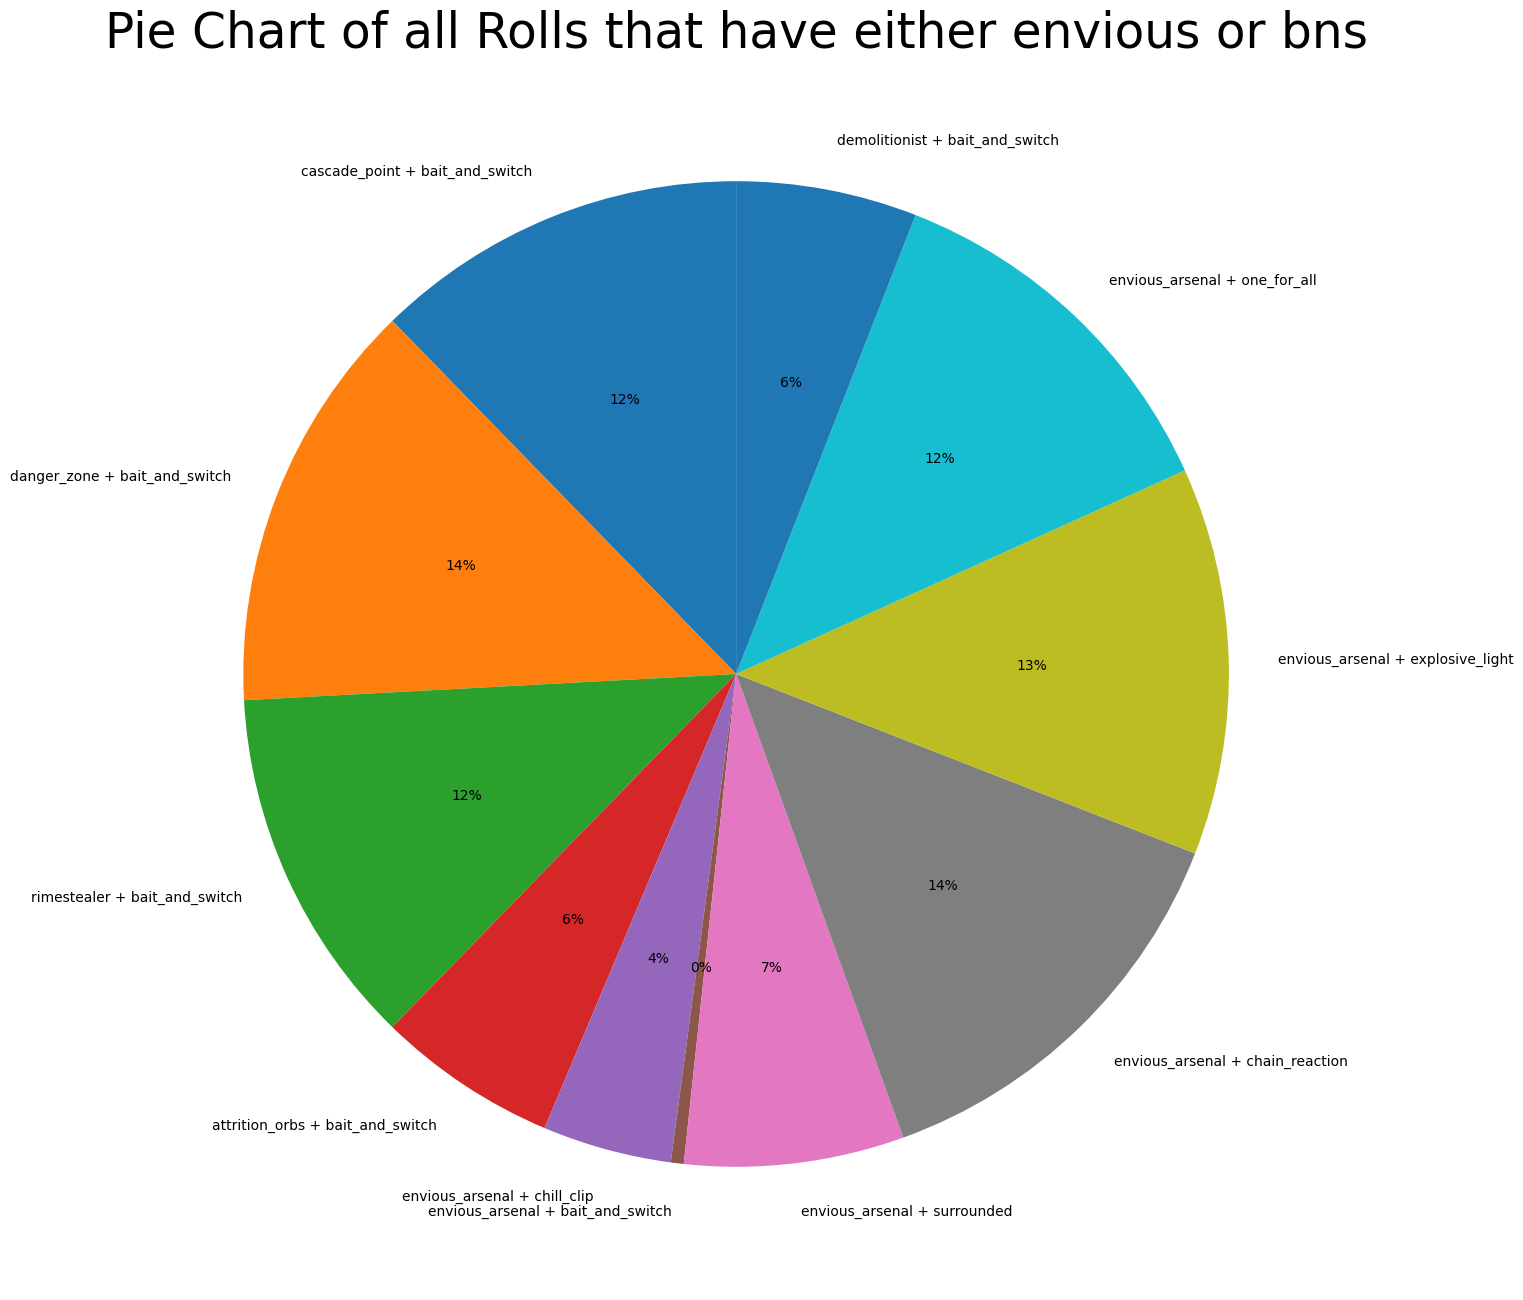

In [153]:
matrix_repr = np.full(chill_inhibitor_cm.shape, 'n', dtype=str)
selected_column = 1
selected_row = 4
matrix_repr[selected_row, :] = 'y'
matrix_repr[:, selected_column] = 'y'

selected_values = []
labels = []
for i in range(chill_inhibitor_cm.shape[0]):
    for j in range(chill_inhibitor_cm.shape[1]):
        if matrix_repr[i, j] == 'y':
            selected_values.append(chill_inhibitor_cm[i, j])
            labels.append(f'{chill_inhibitor_df["perk"][i]} + {chill_inhibitor_df.columns[j+1]}')
            
plt.figure(figsize=(16, 16))
plt.pie(selected_values, labels=labels, autopct='%0.0f%%', startangle=90)
plt.title('Pie Chart of all Rolls that have either envious or bns', fontsize=35)
plt.show()

Visualizing the heatmaps of the drops:

Darker shades mean **more** weapons dropped with the given roll. Lighter shades mean **fewer** of the drops had that roll.

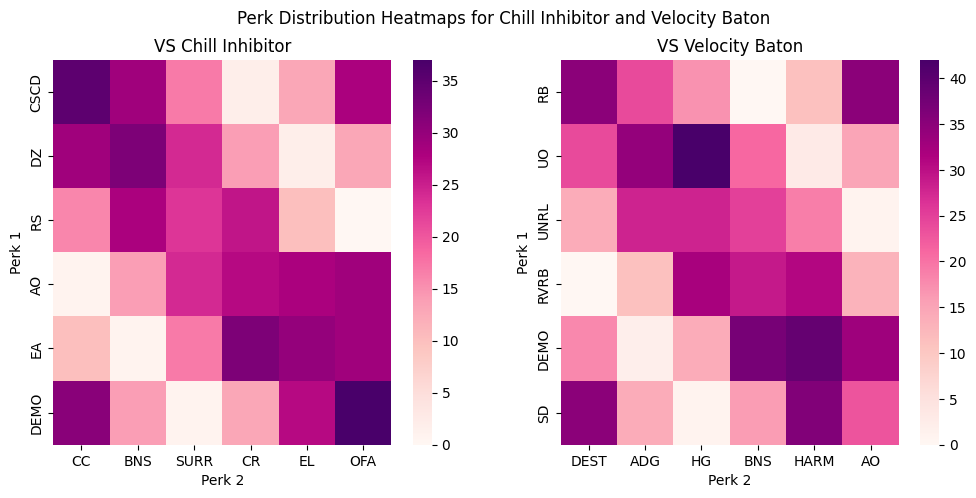

In [190]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(chill_inhibitor_cm, ax=axes[0], cmap='RdPu')
sns.heatmap(velocity_baton_cm, ax=axes[1], cmap='RdPu')

axes[0].set_xlabel('Perk 2')
axes[0].set_ylabel('Perk 1')
axes[0].set_xticklabels(['CC', 'BNS', 'SURR', 'CR', 'EL', 'OFA'])
axes[0].set_yticklabels(['CSCD', 'DZ', 'RS', 'AO', 'EA', 'DEMO'])
axes[0].set_title('VS Chill Inhibitor')

axes[1].set_xlabel('Perk 2')
axes[1].set_ylabel('Perk 1')
axes[1].set_xticklabels(['DEST', 'ADG', 'HG', 'BNS', 'HARM', 'AO'])
axes[1].set_yticklabels(['RB', 'UO', 'UNRL', 'RVRB', 'DEMO', 'SD'])
axes[1].set_title('VS Velocity Baton')

plt.suptitle('Perk Distribution Heatmaps for Chill Inhibitor and Velocity Baton')
plt.show()

3D Visulization of the drops:

If the rolls had a relatively even distribution, we could expect to see a relatively **smooth**, **flat** plane. 

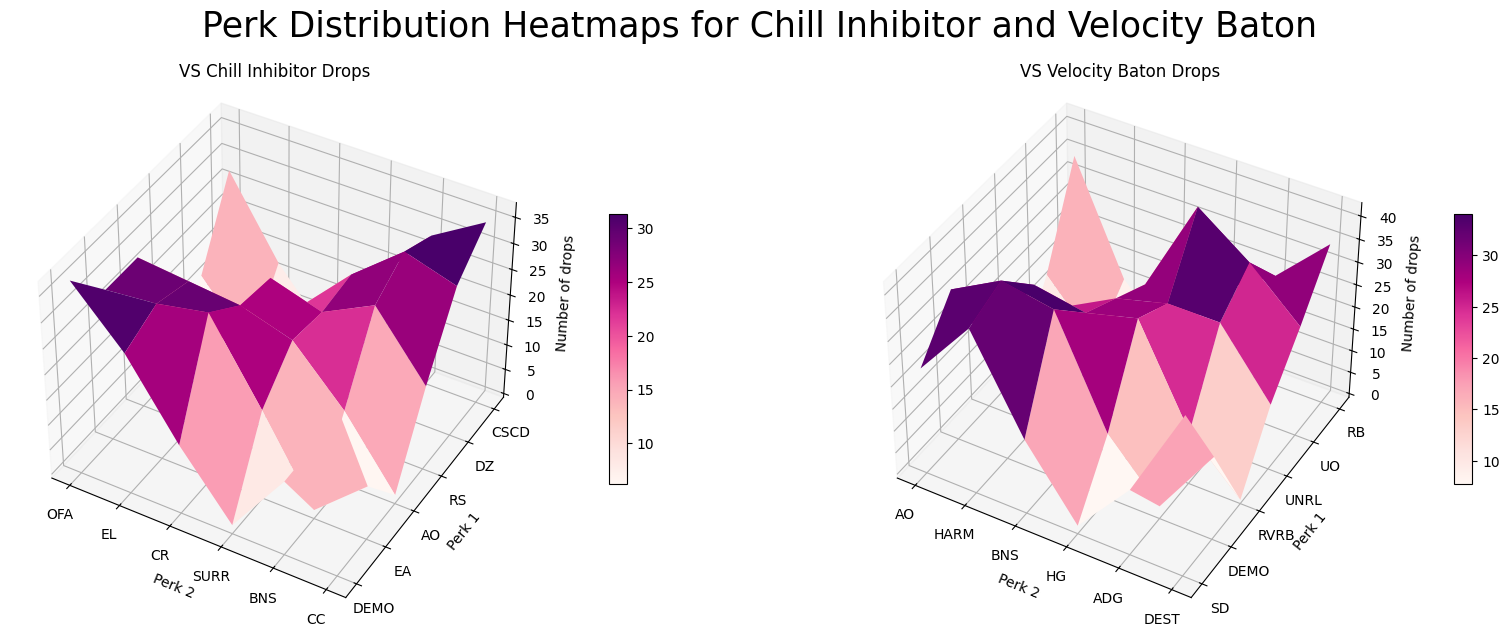

In [189]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(20, 7))

chill_inhibitor_cm = np.array(chill_inhibitor_cm)

x = np.arange(chill_inhibitor_cm.shape[1])
y = np.arange(chill_inhibitor_cm.shape[0])
X, Y = np.meshgrid(x, y)

ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, chill_inhibitor_cm, cmap='RdPu', edgecolor='none')
ax1.set_xticks(x)
ax1.set_xticklabels(['CC', 'BNS', 'SURR', 'CR', 'EL', 'OFA'])
ax1.set_yticks(y)
ax1.set_yticklabels(['CSCD', 'DZ', 'RS', 'AO', 'EA', 'DEMO'])
ax1.set_xlabel('Perk 2')
ax1.set_ylabel('Perk 1')
ax1.set_zlabel('Number of drops')
ax1.set_title('VS Chill Inhibitor Drops')

ax1.view_init(elev=40, azim=120)


velocity_baton_cm = np.array(velocity_baton_cm)

x = np.arange(velocity_baton_cm.shape[1])
y = np.arange(velocity_baton_cm.shape[0])
X, Y = np.meshgrid(x, y)

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, velocity_baton_cm, cmap='RdPu', edgecolor='none', alpha=1)
ax2.set_xticks(x)
ax2.set_xticklabels(['DEST', 'ADG', 'HG', 'BNS', 'HARM', 'AO'])
ax2.set_yticks(y)
ax2.set_yticklabels(['RB', 'UO', 'UNRL', 'RVRB', 'DEMO', 'SD'])
ax2.set_xlabel('Perk 2')
ax2.set_ylabel('Perk 1')
ax2.set_zlabel('Number of drops')
ax2.set_title('VS Velocity Baton Drops')

ax2.view_init(elev=40, azim=120)

fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=15, pad=0.1)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=15, pad=0.1)

plt.suptitle('Perk Distribution Heatmaps for Chill Inhibitor and Velocity Baton', fontsize=25)
plt.show()